In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns

In [0]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [8, 5]
warnings.filterwarnings("ignore", category=FutureWarning)
%config InlineBackend.figure_format = 'retina'

In [0]:
X, y = datasets.make_regression(n_samples=300, n_features=1, noise=25)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(210, 1)
(90, 1)


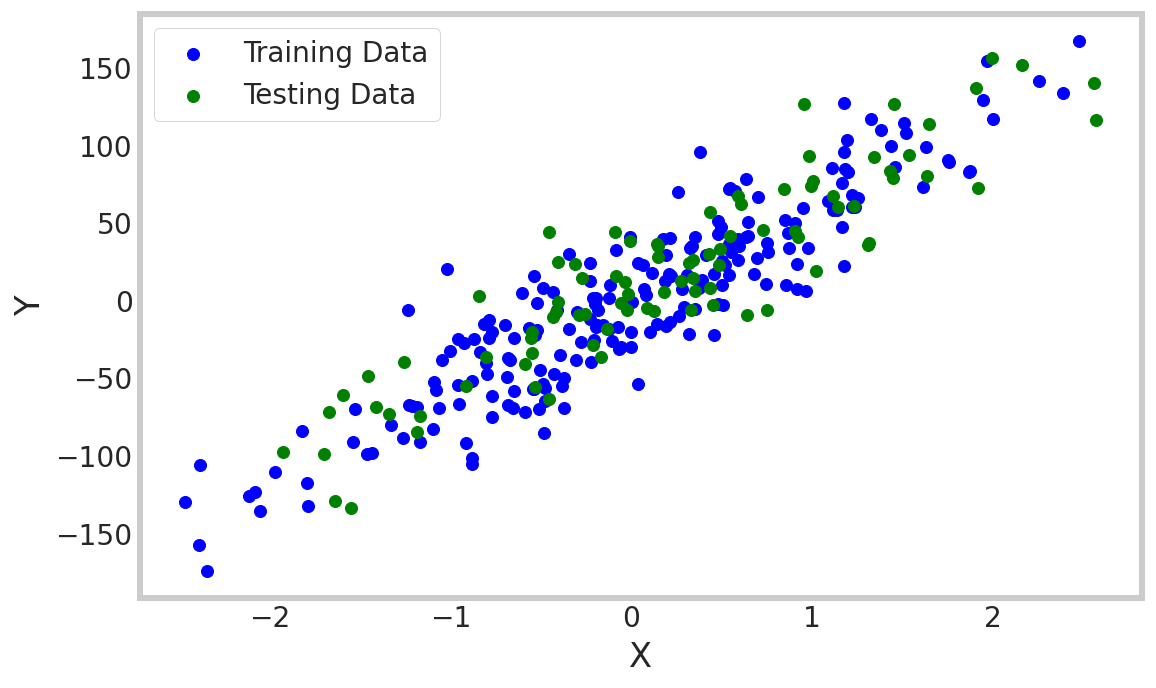

In [162]:
plt.scatter(X_train, y_train, c="blue", label="Training Data")
plt.scatter(X_test, y_test, c="green", label="Testing Data")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [0]:
n_sample, n_features = X_train.shape
weights = np.zeros(n_features)
bias = 0

In [0]:
lr = 0.001
n_iter = 1000

for _ in range(n_iter):
  y_hat = np.dot(X_train, weights)+bias

  w_deriv = (-2)*(1/n_sample)*np.dot(X_train.T, y_train-y_hat)
  b_deriv = (-2)*(1/n_sample)*np.sum(y_train-y_hat)

  weights = weights - (lr*w_deriv)
  bias = bias - (lr*b_deriv)

In [156]:
print(weights)
print(bias)

[50.2653226]
-0.13073227705047885


In [0]:
prediction=[]

for x in X_test:
  y_pred = weights[0]*x+bias
  prediction.append(y_pred)

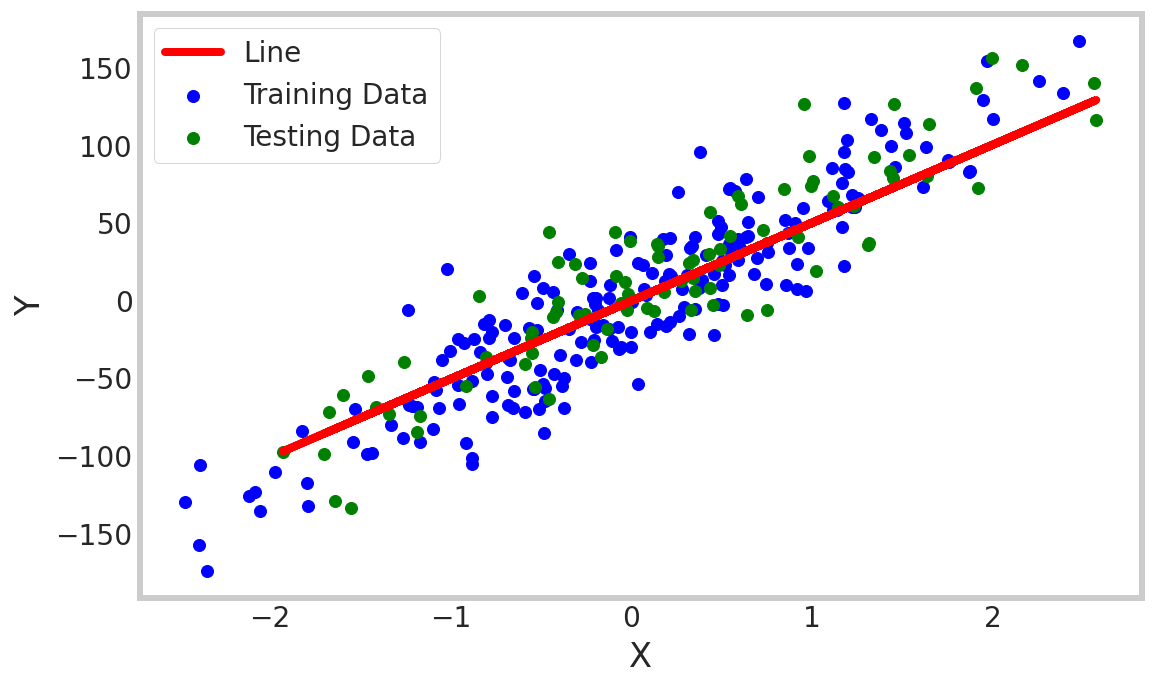

In [161]:
plt.scatter(X_train, y_train, c="blue", label="Training Data")
plt.scatter(X_test, y_test, c="green", label="Testing Data")
plt.plot(X_test, prediction, "red", label="Line")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

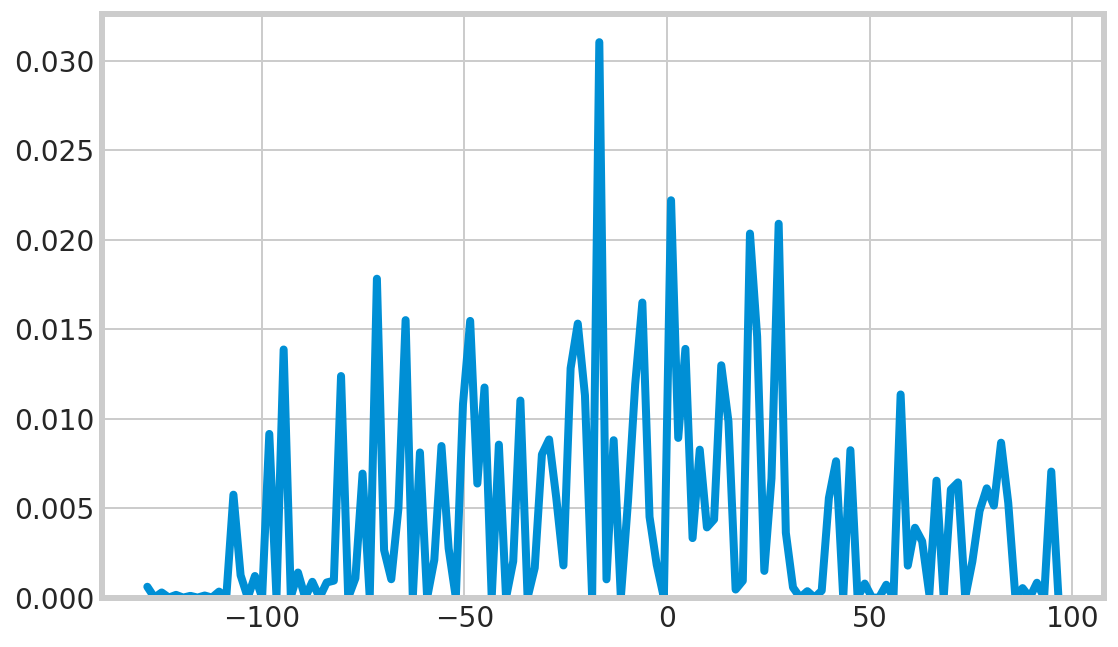

In [159]:
delta_y = []
MSE = 0
for x,y in zip(X_test,prediction):
  error = (x-y)[0]
  MSE += error*error
  delta_y.append(error)

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

In [160]:
import math
RMSE = math.sqrt(MSE/len(X_test))
RMSE

51.11719399311418